SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 06 - Spatial filtering - Low-pass filters (Part 2)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/)) 

-----

## Importing the libraries

In [1]:
import numpy as np

from scipy import ndimage as ndi

from skimage import util, filters

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### %matplotlib notebook

## Creating a simple image

In [2]:
img_simple = np.array([[ 0, 0, 0, 0, 6, 1, 7, 0],
                       [ 0, 7, 7, 7, 0, 6, 1, 7],
                       [ 0, 7, 0, 0, 7, 0, 6, 1],
                       [ 0, 7, 0, 0, 1, 7, 0, 6],
                       [ 0, 7, 7, 0, 0, 0, 0, 0],
                       [ 0, 7, 7, 0, 7, 7, 7, 7],
                       [ 0, 7, 7, 0, 0, 0, 0, 0],
                       [ 0, 0, 0, 0, 7, 7, 7, 7]])

# Print the image 
print(img_simple)

[[0 0 0 0 6 1 7 0]
 [0 7 7 7 0 6 1 7]
 [0 7 0 0 7 0 6 1]
 [0 7 0 0 1 7 0 6]
 [0 7 7 0 0 0 0 0]
 [0 7 7 0 7 7 7 7]
 [0 7 7 0 0 0 0 0]
 [0 0 0 0 7 7 7 7]]


### Plotting the image 

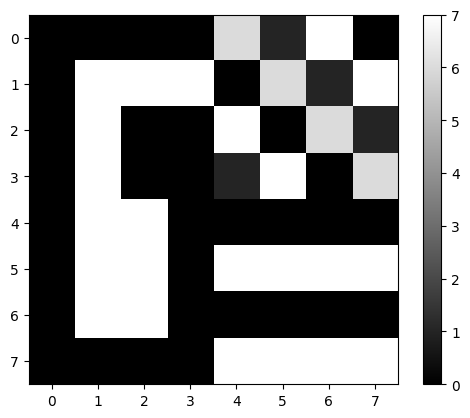

In [3]:
plt.figure()
plt.imshow(img_simple, cmap='gray', vmin=0, vmax=7)
plt.colorbar()
plt.show()

### Mean filter with kernel 3 x 3

In [4]:
# Mean kernel with size 3 x 3
w_avg_3 = np.ones([3, 3]) / (3 * 3)

# Print the kernel
with np.printoptions(precision=4, suppress=True):
    print(w_avg_3)

[[0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]]


In [5]:
# Convert to float to analyze the result with decimal places.
img_simple_ = img_simple.astype(float)

# Apply convolution
img_avg_3 = ndi.convolve(img_simple_, w_avg_3, mode='constant', cval=0)

# Plot the output image
with np.printoptions(precision=4, suppress=True):
    print(img_avg_3)

[[0.7778 1.5556 2.3333 2.2222 2.2222 2.3333 2.4444 1.6667]
 [1.5556 2.3333 3.1111 3.     3.     3.7778 3.2222 2.4444]
 [2.3333 3.1111 3.8889 2.4444 3.1111 3.1111 3.7778 2.3333]
 [2.3333 3.1111 3.1111 1.6667 1.6667 2.3333 2.2222 1.4444]
 [2.3333 3.8889 3.8889 2.4444 2.4444 3.2222 3.7778 2.2222]
 [2.3333 4.6667 4.6667 3.1111 1.5556 2.3333 2.3333 1.5556]
 [1.5556 3.1111 3.1111 3.1111 3.1111 4.6667 4.6667 3.1111]
 [0.7778 1.5556 1.5556 1.5556 1.5556 2.3333 2.3333 1.5556]]


### Plot the image 

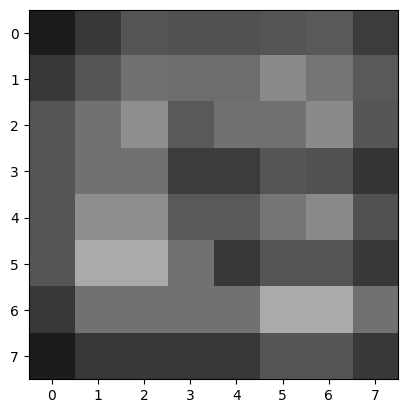

In [6]:
plt.figure()
plt.imshow(img_avg_3, cmap='gray', vmin=0, vmax=7)

plt.show()

### Analyzing the pixel (1, 1) and its neighborhood

In [7]:
img_simple_11 = img_simple[0:3, 0:3]

print(img_simple_11)

[[0 0 0]
 [0 7 7]
 [0 7 0]]


In [8]:
img_avg_3_11 = img_avg_3[0:3, 0:3]

with np.printoptions(precision=4, suppress=True):
    print(img_avg_3_11)

[[0.7778 1.5556 2.3333]
 [1.5556 2.3333 3.1111]
 [2.3333 3.1111 3.8889]]


In [9]:
teste = img_simple_11.sum() / 9

print(teste)

2.3333333333333335


## The mean filter with different mask sizes

### Loading a real image

In [10]:
img_gray = plt.imread('./images/boat.tif')

# Information about the images
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


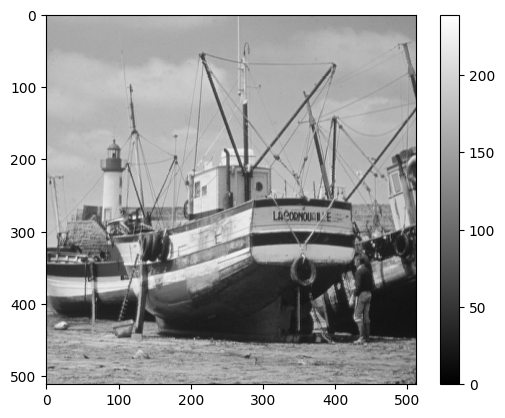

In [11]:
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.colorbar()

### Let's make the image "worse" with Gaussian noise

In [12]:
img_gray = util.img_as_ubyte(util.random_noise(img_gray, mode='gaussian'))

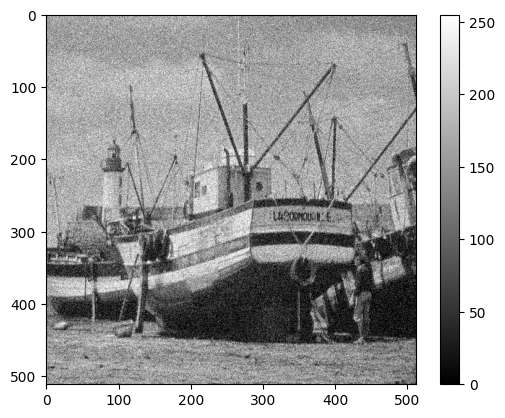

In [13]:
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.colorbar()

### Applying the mean filter with sizes 3, 5, 9 and 15

In [14]:
mask_size_list = [3, 5, 9, 15]

In [15]:
mask_list = []
img_avg_list = []

for mask_size in mask_size_list:
    mask_temp = np.ones([mask_size, mask_size]) / (mask_size * mask_size)
    mask_list.append(mask_temp)
    
    img_avg_temp = ndi.convolve(img_gray, mask_temp)
    img_avg_list.append(img_avg_temp)  


### Printing the kernels

In [16]:
for mask_size, mask in zip(mask_size_list, mask_list):
    print('\n Máscara %d x %d' % (mask_size, mask_size))
    with np.printoptions(precision=4, suppress=True):
        print(mask)


 Máscara 3 x 3
[[0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]
 [0.1111 0.1111 0.1111]]

 Máscara 5 x 5
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]

 Máscara 9 x 9
[[0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]
 [0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123 0.0123]]

 Máscara 15 x 15
[[0.0044 0.0044 0.0044 0.0044 0.0044 0.0044 0.0044 0.0044 0.0044 0.0044
  0.0044 0.0044 0.0044 0.0044 0.0044]
 [0.0044 0.0044

### Cropping a region of interest in the images

In [17]:
img_rdi_list = []

for img_avg in img_avg_list:
    img_rdi_temp = img_avg[190:250, 190:250]
    
    img_rdi_list.append(img_rdi_temp)    

#### Plotting the images and regions of interest

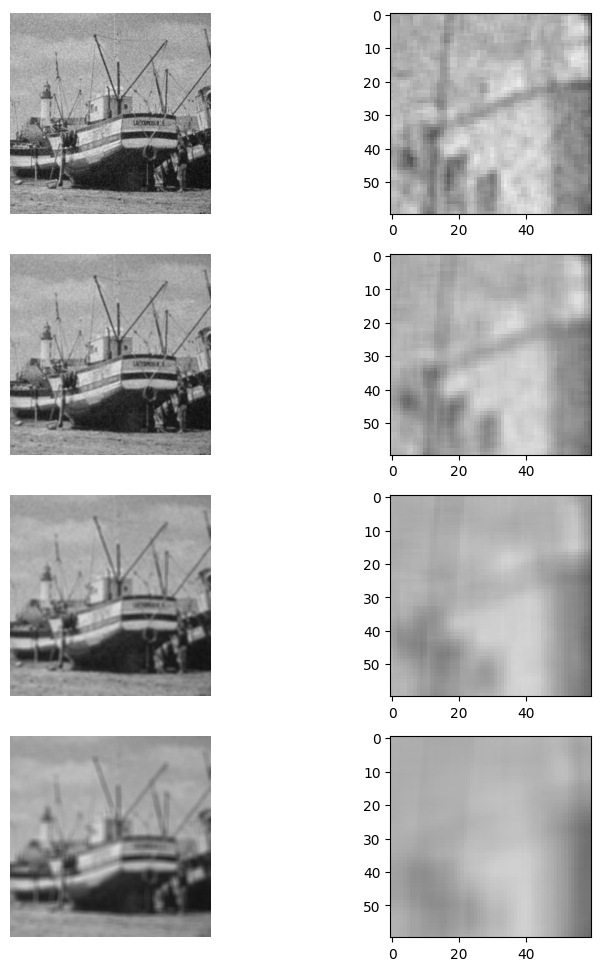

In [18]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_avg, img_rdi) in enumerate(zip(img_avg_list, img_rdi_list)):

    ax[i,0].imshow(img_avg, cmap='gray', vmin=0, vmax=255)
    ax[i,0].axis('off')
    
    ax[i,1].imshow(img_rdi, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    ax[i,0].axis('off')
    
plt.show()

## Gaussian Filter

### Create a 2D Gaussian function

<font size="5">
$$G(x, y) = \frac{1}{\sqrt{2\pi\sigma}}e^{- \frac{{x^2}+{y^2}}{2\sigma^2}}$$</font>
<br />

In [19]:
def gaussiana(sigma=1):
    # Mask size: sigma x 6 + 1
    mask_size = sigma * 6 + 1
    
    img_temp = np.zeros([mask_size, mask_size])
    
    for x in range(mask_size):
        for y in range(mask_size):
            x_ = x - (mask_size - 1) / 2
            y_ = y - (mask_size - 1) / 2
            
            img_temp[x, y] = (1 / np.sqrt((2 * np.pi * sigma))) * np.exp( - (x_**2. + y_**2.) / (2 * sigma ** 2))
            
    return img_temp

In [20]:
# Gaussian function with sigma = 1
mask_gauss_1 = gaussiana(1)

with np.printoptions(precision=3, suppress=True):
    print(mask_gauss_1)

[[0.    0.001 0.003 0.004 0.003 0.001 0.   ]
 [0.001 0.007 0.033 0.054 0.033 0.007 0.001]
 [0.003 0.033 0.147 0.242 0.147 0.033 0.003]
 [0.004 0.054 0.242 0.399 0.242 0.054 0.004]
 [0.003 0.033 0.147 0.242 0.147 0.033 0.003]
 [0.001 0.007 0.033 0.054 0.033 0.007 0.001]
 [0.    0.001 0.003 0.004 0.003 0.001 0.   ]]


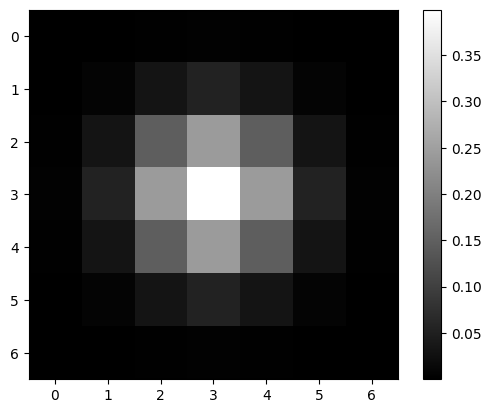

In [21]:
plt.figure()
plt.imshow(mask_gauss_1, cmap='gray')
plt.colorbar()

### Applying Gaussian filters with different standard deviations

In [22]:
sigmas_list = [1, 2, 4, 8]

w_gauss_list = []
for sigma in sigmas_list:
    w_gauss_temp = gaussiana(sigma)
    w_gauss_list.append(w_gauss_temp)

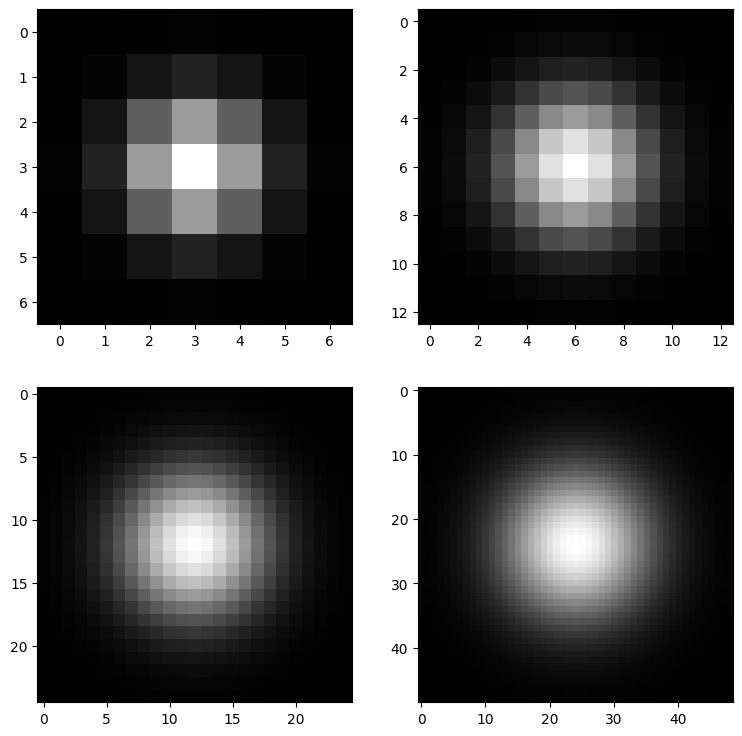

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))

img_ = ax1.imshow(w_gauss_list[0], cmap='gray', interpolation='nearest')
img_ = ax2.imshow(w_gauss_list[1], cmap='gray', interpolation='nearest')
img_ = ax3.imshow(w_gauss_list[2], cmap='gray', interpolation='nearest')
img_ = ax4.imshow(w_gauss_list[3], cmap='gray', interpolation='nearest')

plt.show()


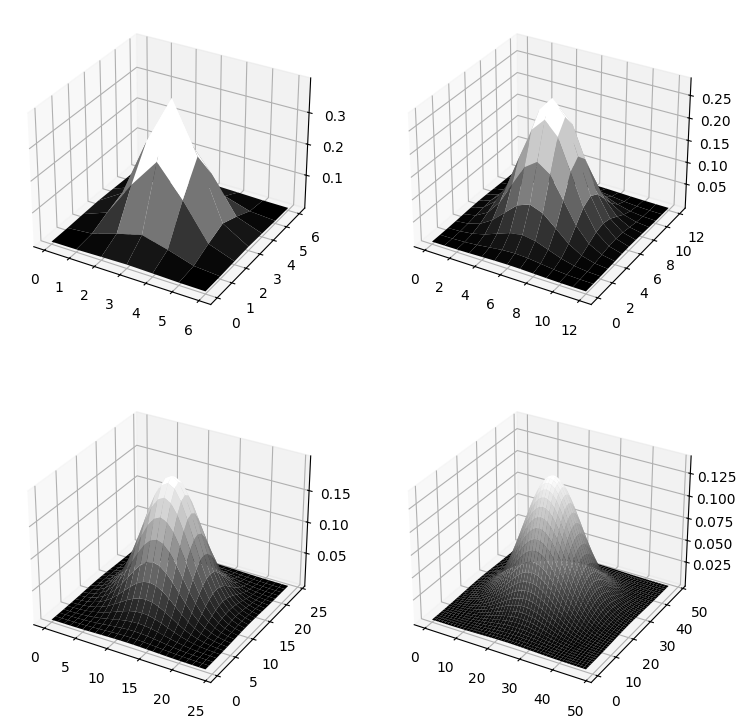

In [24]:
fig = plt.figure(figsize=(9, 9))

for i, mask in enumerate(w_gauss_list):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # Create the x and y coordinate arrays.
    xx, yy = np.mgrid[0:mask.shape[0], 0:mask.shape[1]]


    ax.plot_surface(xx, yy, mask ,rstride=1, cstride=1, cmap='gray', linewidth=0)

plt.show()

In [25]:
img_gauss_list = []

for sigma, w_gauss in zip(sigmas_list, w_gauss_list):
    # The sum of the mask coefficients must be 1.
    # -------------------------------------------
    w_gauss_ = w_gauss / w_gauss.sum()
    
    # TEST
    print(sigma, w_gauss.sum(), w_gauss_.sum())
    
    img_gauss_temp = ndi.convolve(img_gray, w_gauss_)
    img_gauss_list.append(img_gauss_temp)

1 2.505271666920436 0.9999999999999999
2 7.075301515761269 1.0
4 19.98372416431721 1.0
8 56.47145646727666 1.0


### Recorta regiões de interesse nas imagens

In [26]:
img_gauss_rdi_list = []

for img_gauss in img_gauss_list:
    img_gauss_rdi = img_gauss[190:250, 190:250]
    
    img_gauss_rdi_list.append(img_gauss_rdi)      

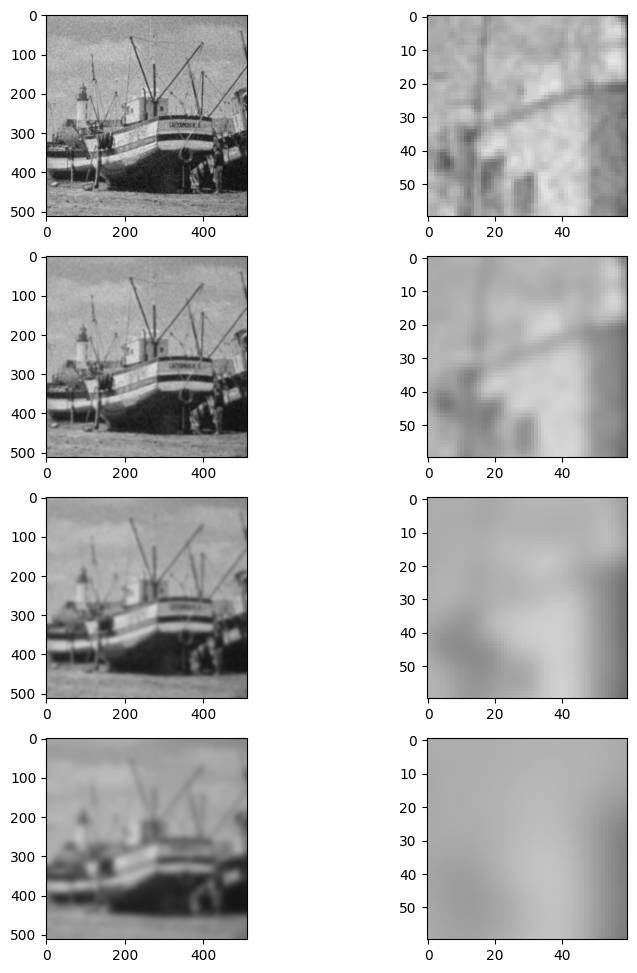

In [27]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_gauss, img_gauss_rdi) in enumerate(zip(img_gauss_list, img_gauss_rdi_list)):

    ax[i,0].imshow(img_gauss, cmap='gray', vmin=0, vmax=255)
    
    ax[i,1].imshow(img_gauss_rdi, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    
plt.show()

### Gaussian Filter - scikit-image

In [28]:
img_gauss_sk = util.img_as_ubyte(filters.gaussian(img_gray, sigma=2))

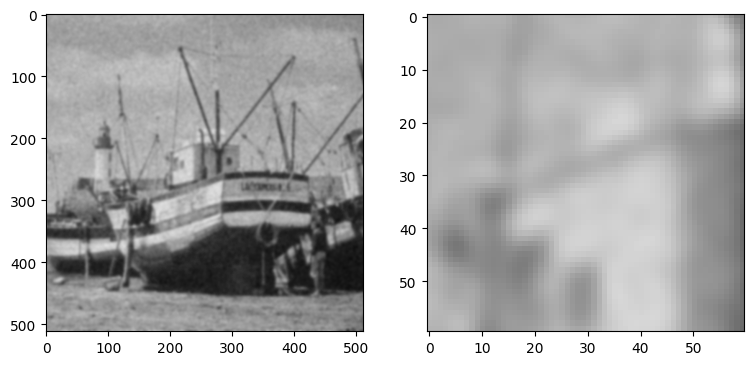

In [29]:
fig, ax  = plt.subplots(1,2, figsize=(9, 5))
ax[0].imshow(img_gauss_sk, cmap='gray', vmin=0, vmax=255)

ax[1].imshow(img_gauss_sk[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')
   
plt.show()

## Median filter
----

* Non-linear operation, cannot be applied using convolution

### Salt and pepper noise

In [30]:
img_gray_sp = util.img_as_ubyte(util.random_noise(img_gray, mode='s&p'))

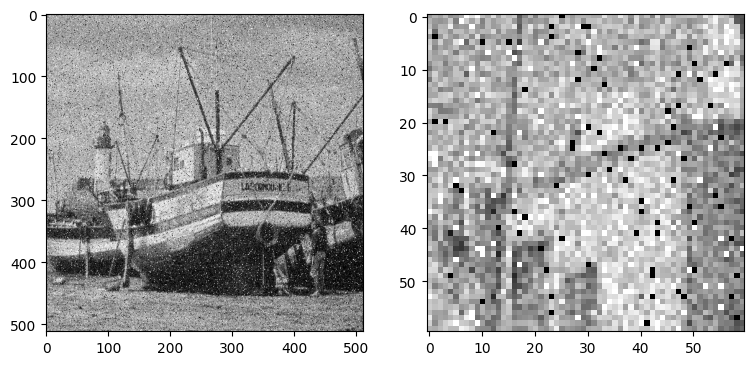

In [31]:
fig, ax  = plt.subplots(1, 2, figsize=(9, 5))
ax[0].imshow(img_gray_sp, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_gray_sp[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')

### Trying with average filter

In [32]:
img_gray_sp_avg = ndi.convolve(img_gray_sp, np.ones([5,5])/25)

#### Plotting the image 

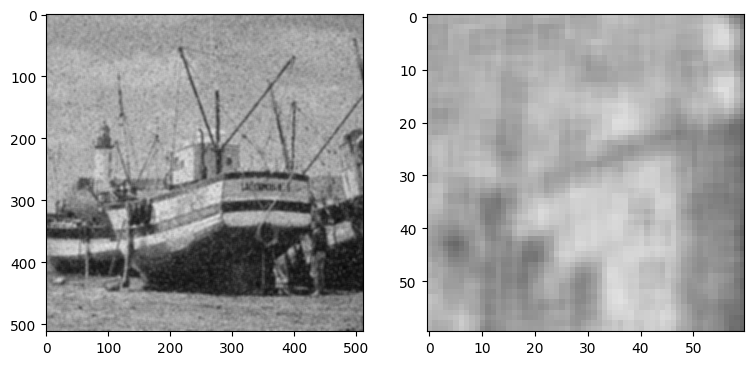

In [33]:
fig, ax  = plt.subplots(1, 2, figsize=(9, 5))
ax[0].imshow(img_gray_sp_avg, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_gray_sp_avg[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')

In [34]:
## SELECT THE IMAGE
img_gray_ = img_gray_sp

In [35]:
def get_neigh_2(img, x, y, neigh=3):
    """
    Gets the neighborhood values of a pixel
    """
    neigh_out = []
    neigh_ = int((neigh - 1) // 2)
    for i in range(x-neigh_, x+neigh_+1):
        for j in range(y-neigh_, y+neigh_+1):
            val = img[i, j]
            neigh_out.append(val)
            
    return np.array(neigh_out)

In [36]:
# TEST
out = get_neigh_2(img_simple, 2,3)

print(img_simple)
print('\n(2,3)')
print(out)

[[0 0 0 0 6 1 7 0]
 [0 7 7 7 0 6 1 7]
 [0 7 0 0 7 0 6 1]
 [0 7 0 0 1 7 0 6]
 [0 7 7 0 0 0 0 0]
 [0 7 7 0 7 7 7 7]
 [0 7 7 0 0 0 0 0]
 [0 0 0 0 7 7 7 7]]

(2,3)
[7 7 0 0 0 7 0 0 1]


In [37]:
# Note: This is a simple implementation for educational purposes.
#       It is not the most efficient way of calculating a median filter.

mask_size = 3

# Padding the image
pad_size = (mask_size - 1) // 2
### img_pad = util.pad(img_gray_, pad_size, mode='constant', constant_values=(0, 0))
img_pad = np.pad(img_gray_, pad_size, mode='constant', constant_values=(0, 0))
# TEST
print('\n' + str(mask_size))
print(img_pad.shape)
print(img_pad[0:6, 0:6])

# Output image with the same size as the padded image
img_out = np.zeros(img_pad.shape)

for i in range(pad_size, img_gray_.shape[0]-pad_size):
    for j in range(pad_size, img_gray_.shape[1]-pad_size):
        # Obtém a izinhança do pixel
        n = get_neigh_2(img_pad, i, j, neigh=mask_size)

        # Compute the median
        result = np.median(n)
        img_out[i, j] = result

        # Other common non-linear filters
        # Maximum (uncomment)
        # --------------------
        ###### img_out[i, j] = n.max()
        # Minimum (uncomment)
        # --------------------
        ####### img_out[i, j] = n.min()

# Remove paddings
img_out = img_out[pad_size:img_pad.shape[0]-pad_size, pad_size:img_pad.shape[1]-pad_size]
print(img_out.shape)


3
(514, 514)
[[  0   0   0   0   0   0]
 [  0 130 180 166 169 174]
 [  0 173 165 151 191 141]
 [  0 130 186   0 193 140]
 [  0 162  95 182 167 193]
 [  0 183 158  98 160 123]]
(512, 512)


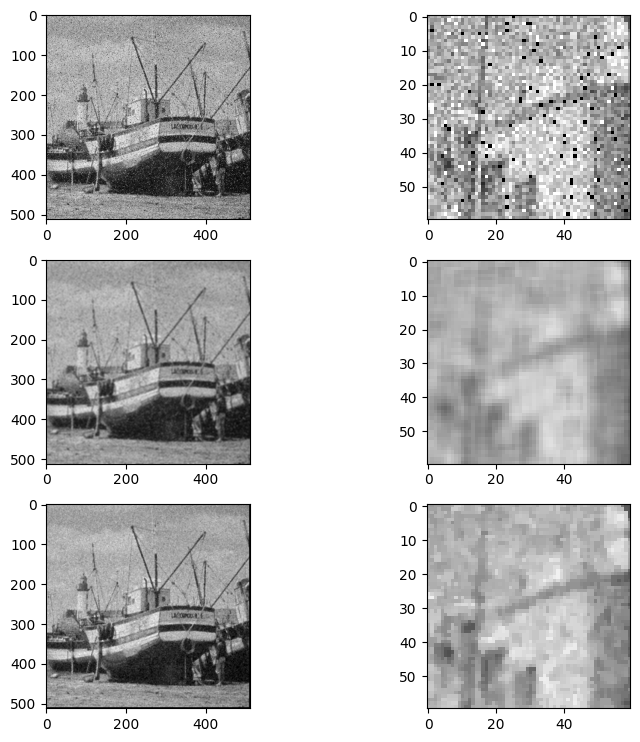

In [38]:
fig, ax  = plt.subplots(3, 2, figsize=(9, 9))

ax[0,0].imshow(img_gray_sp, cmap='gray', vmin=0, vmax=255)
ax[0,1].imshow(img_gray_sp[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')

ax[1,0].imshow(img_gray_sp_avg, cmap='gray', vmin=0, vmax=255)
ax[1,1].imshow(img_gray_sp_avg[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')

ax[2,0].imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax[2,1].imshow(img_out[190:250, 190:250], cmap='gray', vmin=0, vmax=255, interpolation='nearest')

### Median filter using scikit-image

In [39]:
# We will apply the median filter with the following mask sizes.
mask_size_list = [3, 5, 7, 9]

# List that will contain the filtering results.
img_median_list = []

for mask_size in mask_size_list:
    img_median = filters.median(img_gray_, np.ones([mask_size,mask_size]))
            
    img_median_list.append(img_out)        

In [40]:
img_median_rdi_list = []

for img_median in img_median_list:
    img_median_rdi = img_median[190:250, 190:250]
    
    img_median_rdi_list.append(img_median_rdi)    

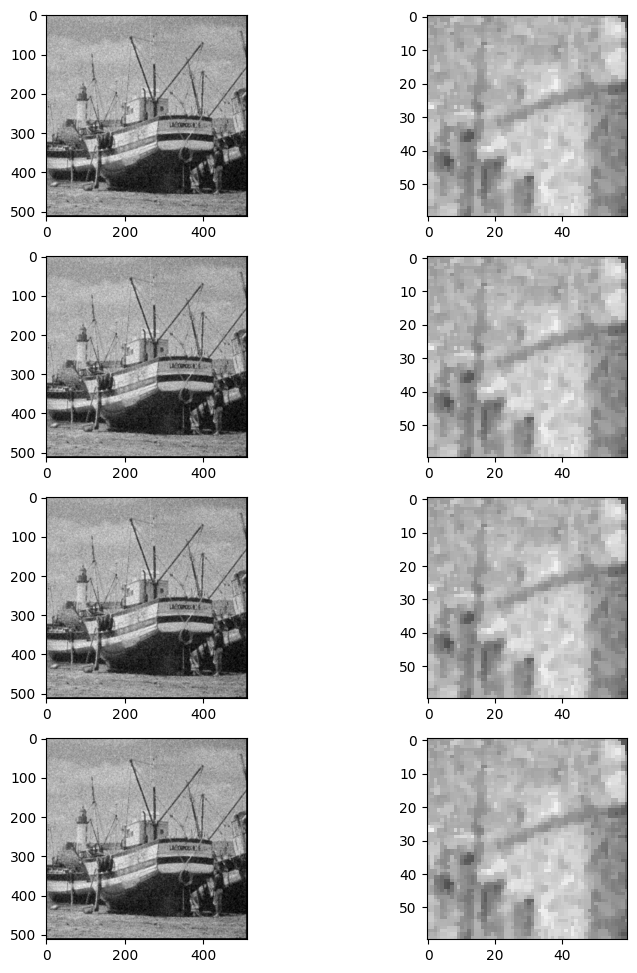

In [41]:
fig, ax  = plt.subplots(4, 2, figsize=(9, 12))
for i, (img_median, img_median_rdi) in enumerate(zip(img_median_list, img_median_rdi_list)):

    ax[i,0].imshow(img_median, cmap='gray', vmin=0, vmax=255)
    
    ax[i,1].imshow(img_median_rdi, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    
plt.show()

## Comparison between filters: mean Vs. Gaussian Vs. median

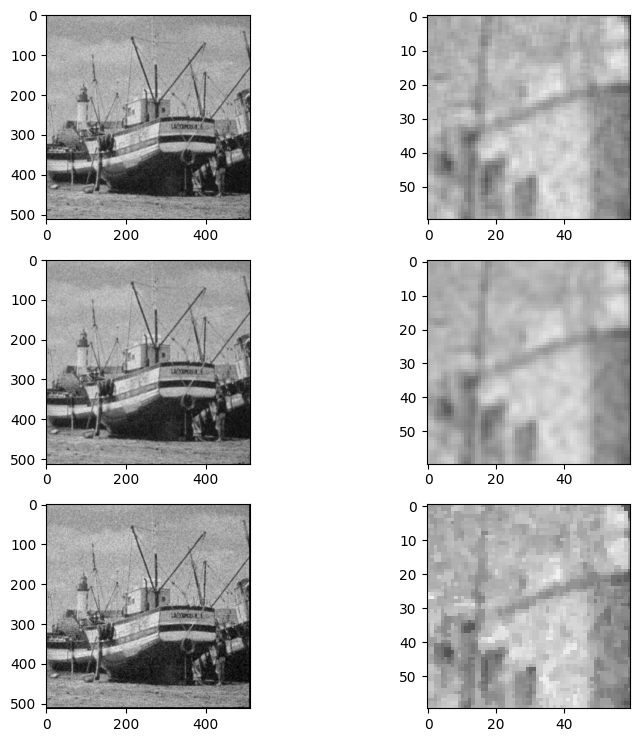

In [42]:
# [mean 3x3, Gaussian sigma=1 (7x7), median 3x3]
img_full_list = [img_avg_list[0], img_gauss_list[0], img_median_list[0]]

img_rdi_list_ = [img_rdi_list[0], img_gauss_rdi_list[0], img_median_rdi_list[0]]

fig, ax  = plt.subplots(3, 2, figsize=(9, 9))
for i, (img_, img_rdi_) in enumerate(zip(img_full_list, img_rdi_list_)):

    ax[i,0].imshow(img_, cmap='gray', vmin=0, vmax=255)
    
    ax[i,1].imshow(img_rdi_, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    
plt.show()

## Bibliography
---

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* scikit-image. Documentação. Module 'filters'.
    * https://scikit-image.org/docs/dev/api/skimage.filters.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* NumPy. Convolution
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
* More about Convolutional Neural Networks...
    * Amelie Byun et al. CS231n: Convolutional Neural Networks for Visual Recognition. Spring 2020
    * https://cs231n.github.io/convolutional-networks/   